# Energy and Environment Homework - Mathilde, Hardi and Edem

## General
- Power demand follows French consumption from 2023 and will be rescaled to 1 TWh over the year
- solar production follows hourly profile from France 2024
- dispatchable (gas, nuclear, hydro, ...) are aggregated into one single source, which can be adjusted from 0 to 100% of the installed capacity
- among the dispatachble sources, we consider an IDEAL storage system (energy stored can be fully recovered)
- the data in the CSV is in MW

## Question 1
The load factor (Edem: Should it be capacity factor instead?!) is the ratio between the average and installed
power. Explain why this quantity can be approximated as the ratio of the average and maximal power throughout the year. Estimate the load factor of the solar production.

### Answer:
When providing the capacity of a PV system, the nameplate power of the system is used which was measured under standard conditions (1000 W/m2 solar irradiance, AM1.5 spectrum, and a cell temperature of 25°C) which is approximately equivalent to a sunny day in western europe. Since the maximum solar power output in France will have appeared on a sunny day, the conditions on this day will be similar to the standard conditions used to determine the capacity  (in some regions irradiance might have been a bit higher than 1000 W/m2, in some other regions a bit lower). Thus, we can estimate the capacity by the maximum solar generation thorughout the year.

As calculated below, the capacity factor (load factor) of Solar energy in France 2023 was approx. 0.189 .


In [2]:
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv(
    "data-Rte-2023-CSV.csv",
    sep=';',          # correct delimiter
    encoding='utf-8', # handles accents
    on_bad_lines='skip'  # skip problematic lines
)

df["date_time"] = pd.to_datetime(df["Date"] + " " + df["Heures"], dayfirst=True, errors="coerce")
df = df.set_index("date_time")

average_power_solar = df['Solaire'].mean()

capacity_factor_solar = average_power_solar/df['Solaire'].max()
print('Estimated Capacity Factor for Solar Generation in France 2023: ', capacity_factor_solar)

Estimated Capacity Factor for Solar Generation in France 2023:  0.1892321940818236


In [4]:
df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
date_time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,France,Données définitives,01.01.2023,00:00,47571.0,46600.0,48000.0,81.0,24.0,2418.0,...,4987.0,1224.0,743.0,534.0,431.0,333.0,0.0,0.0,14967.0,405.0
2023-01-01 00:15:00,France,Données définitives,01.01.2023,00:15,NaN,46050.0,47500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:30:00,France,Données définitives,01.01.2023,00:30,46342.0,45500.0,47000.0,68.0,24.0,2423.0,...,4792.0,1048.0,842.0,537.0,426.0,337.0,0.0,0.0,13847.0,404.0
2023-01-01 00:45:00,France,Données définitives,01.01.2023,00:45,NaN,44650.0,46350.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 01:00:00,France,Données définitives,01.01.2023,01:00,44790.0,43800.0,45700.0,67.0,25.0,2445.0,...,4781.0,1195.0,891.0,537.0,426.0,338.0,0.0,0.0,11471.0,404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:00:00,France,Données définitives,31.12.2023,23:00,55564.0,53000.0,54800.0,96.0,17.0,1973.0,...,5085.0,1669.0,324.0,515.0,352.0,352.0,0.0,0.0,15476.0,582.0
2023-12-31 23:15:00,France,Données définitives,31.12.2023,23:15,NaN,53250.0,55050.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-31 23:30:00,France,Données définitives,31.12.2023,23:30,55277.0,53500.0,55300.0,96.0,18.0,1935.0,...,5004.0,1557.0,74.0,515.0,349.0,351.0,0.0,0.0,15294.0,581.0


## Question 2
We will first consider an integration strategy relying entirely on the dispatchable source.
- The installed solar capacity is such that x TWh are produced over the year.
- We don’t consider storage in this question.
- When the solar power exceeds demand, production is curtailed. When solar power is not sufficient
 to meet power demand, the difference is supplied by the dispatchable source.

### 2.1 Plot the required installed capacity of the dispatchable source (in GW) as a function of the solar production

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_16328\1969982822.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  residual_max_per_bin = solar_residual_load.groupby(binned).max()


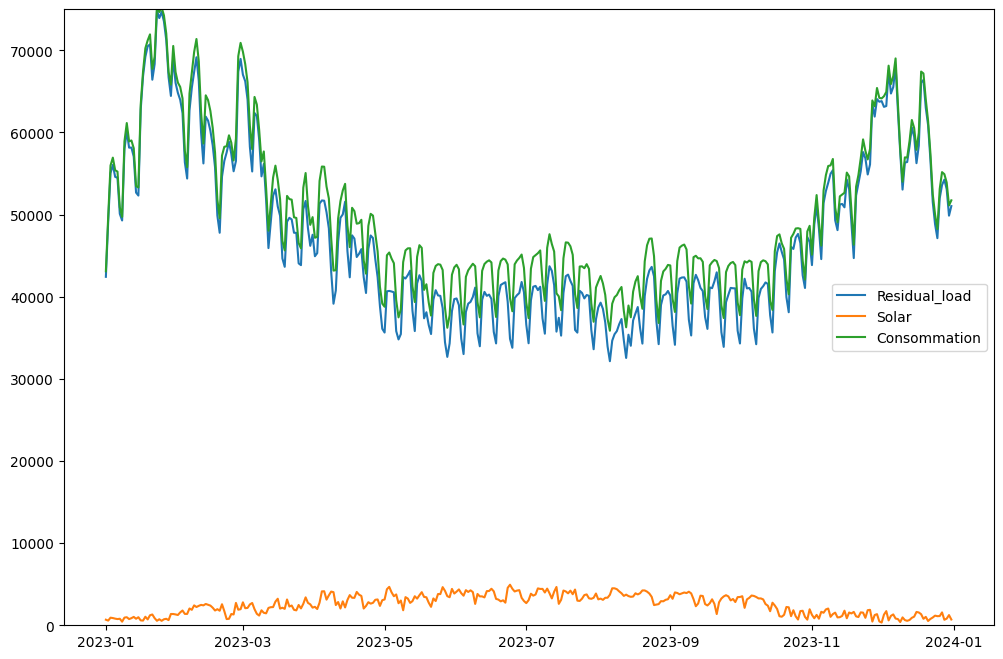

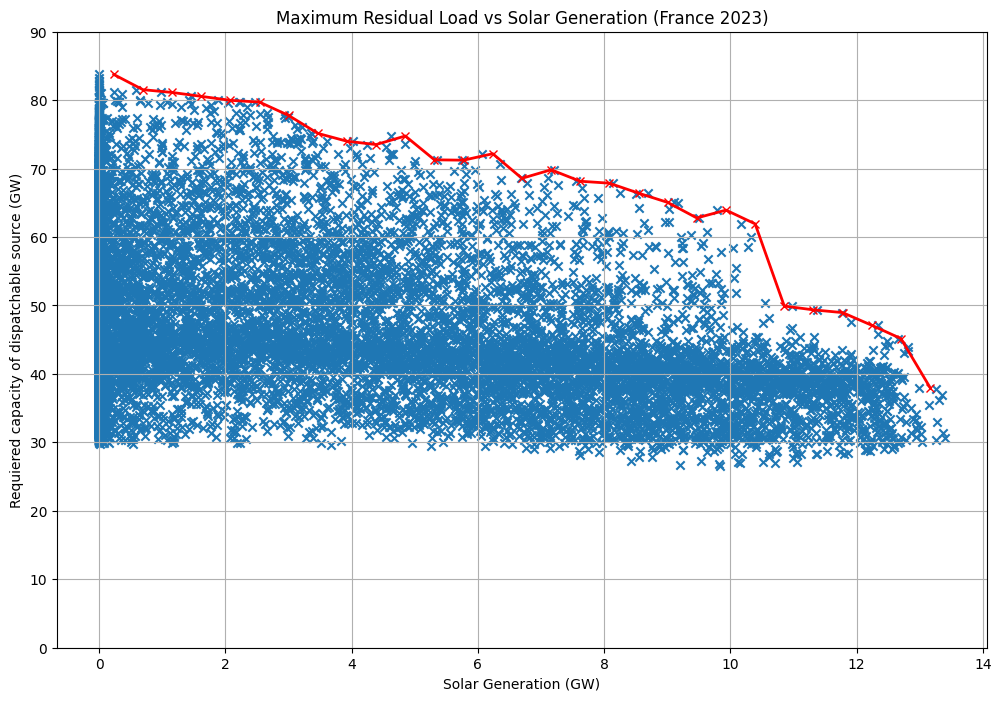

In [5]:
solar_residual_load = (df['Consommation']-df['Solaire']).dropna()
#required_dispatchable_capacity = solar_residual_load.resample('D').mean().groupby(df['Solaire'].dropna().resample('D').mean())


plt.figure(figsize=[12,8])
plt.plot(solar_residual_load.resample('D').mean())
plt.plot(df['Solaire'].dropna().resample('D').mean())
plt.plot(df['Consommation'].dropna().resample('D').mean())
plt.ylim(0, 75000)
plt.legend(['Residual_load','Solar', 'Consommation'])

plt.figure(figsize=[12,8])
plt.scatter(df['Solaire'].dropna()/1000,solar_residual_load/1000, marker='x')
plt.xlabel('Solaire')
plt.ylabel('Consommation')
plt.ylim(0, 90)




'''
# Ordinary Least Square Linear regression (APPROACH WRONG: Requiered capacity is always the maximum) - On Average required capacity
# Define a linear regressor
reg = linear_model.LinearRegression(fit_intercept=True)

# Prepare input and output for fit
X_train = df['Solaire'].dropna().values[:, None]
y_train = solar_residual_load.values

# Fit
reg.fit(X_train, y_train)

# Print
print('Estimated coefficients:')
print('Intercept:\t{:.2e} (MWh) UNIT WRONG'.format(reg.intercept_))
print('Slope:\t\t{:.2e} (MWh/°C) UNIT WRONG'.format(reg.coef_[0]))

# Compute the train R2 with Scikit-Learn and print them
r2_train = reg.score(X_train, y_train)
print('Train R2:\t{:.2f}'.format(r2_train))

# Define an array of 100 temperatures ranging from -5 to 35°C
x_pred = np.linspace(0, 14, 100)

# Prepare these temperatures for the prediction
X_pred = x_pred[:, None]

# Predict
y_pred = reg.predict(X_pred)

plt.plot(x_pred, y_pred, color='red')
plt.legend(['daily average residual load','linear model of temperature dependency of residual load'])
'''





# Maximum capacity

# 1. Find maximum solar generation
solar_max = df['Solaire'].max()

# 2. Create 49 evenly spaced bins from 0 to solar_max
bins = np.linspace(0, solar_max, 30)

# 3. Bin the solar generation values
binned = pd.cut(df['Solaire'], bins=bins, include_lowest=True)

# 4. For each bin, compute the maximum residual load
residual_max_per_bin = solar_residual_load.groupby(binned).max()

# 5. Compute representative (midpoint) solar generation value for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

# 6. Convert to DataFrame for clarity
result = pd.DataFrame({
    "Solar_Gen_bin_center_MW": bin_centers,
    "Max_Residual_Load_MW": residual_max_per_bin.values
})

# 7. Plot the relationship
plt.plot(result["Solar_Gen_bin_center_MW"]/1000,  # optional: convert to GW
         result["Max_Residual_Load_MW"]/1000, 'x-', lw=2, color='red')
plt.xlabel("Solar Generation (GW)")
plt.ylabel("Requiered capacity of dispatchable source (GW)")
plt.title("Maximum Residual Load vs Solar Generation (France 2023)")
plt.grid(True)
plt.show()

In [137]:
solar_residual_load.head()

date_time
2023-01-01 00:00:00    47571.0
2023-01-01 00:30:00    46342.0
2023-01-01 01:00:00    44790.0
2023-01-01 01:30:00    45276.0
2023-01-01 02:00:00    45246.0
dtype: float64

###  3. Plot the amount of electricity produced by the dispatchable source and the total amount of electricity produced by the whole system over the year (in TWh) as a function of the solar production

In [6]:
total_electricity_production = df['Consommation'].sum()/1e-6

plt.figure(figsize=[12,8])
#plt.plot(total_electricity_production, bins)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>